
# Árvores de Decisão: Regressão

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import pandas as pd
import numpy as np

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import dtreeviz

# Pacotes de modelagem
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Módulo de Análise Exploratória
import aed

c:\Users\rocki\OneDrive\Documentos\GitHub\Salario\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importação da base de dados

In [2]:
df_rh = pd.read_csv('dados/base_funcionarios_v4.csv', 
                    sep=',',
                    index_col=0)
df_rh.sample(n=5)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados
39,8082.2,4,20,43.252417,Sim
22,6385.2,2,6,13.372502,Não
33,5228.3,3,2,11.777204,Não
15,11974.4,12,25,49.398664,Sim
36,6788.4,5,21,45.347098,Não


## Preparação dos Dados

### Missing Values

In [3]:
df_rh.isnull().sum()

Salario               0
Anos_Educ_Superior    0
Tempo_Empresa         0
Tempo_de_Carreira     0
Possui_Skill_Dados    0
dtype: int64

### Duplicações

In [4]:
df_rh.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df_rh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salario             46 non-null     float64
 1   Anos_Educ_Superior  46 non-null     int64  
 2   Tempo_Empresa       46 non-null     int64  
 3   Tempo_de_Carreira   46 non-null     float64
 4   Possui_Skill_Dados  46 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 2.2+ KB


## Análise Exploratória dos Dados

### Dispersão por Classe

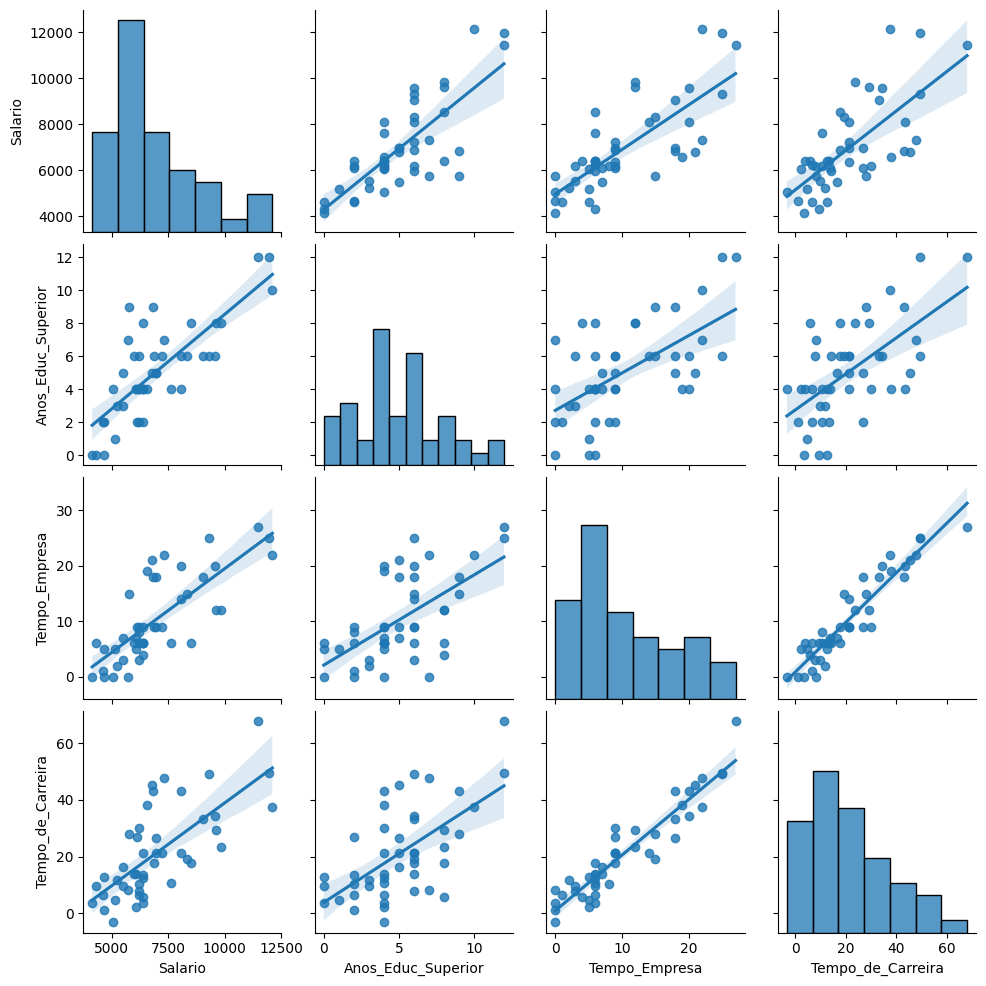

In [6]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df_rh, kind='reg');

### Relatórios Pandas Profiling e SweetViz

In [7]:
perfil_pp, perfil_sv = aed.gera_relatorios_aed(df=df_rh,
                                               target_feat='Salario')

c:\Users\rocki\OneDrive\Documentos\GitHub\Salario\venv\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 331.46it/s]
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Desenvolvimento do Modelo: Árvores de Decisão
Neste exemplo utilizaremos a biblioteca Scikit Learn, uma das mais utilizadas para o desenvolvimento de modelos de *Machine Learning*.

### Definição do *Target* e das *Features*

In [8]:
# Criação das variáveis dummies
df_rh_modelo = pd.get_dummies(df_rh)
df_rh_modelo.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Não,Possui_Skill_Dados_Sim
0,5517.4,3,3,9.777079,True,False
1,6399.9,4,6,3.765998,True,False
2,6206.7,6,3,7.926264,True,False
3,6060.6,4,5,2.233497,True,False
4,6122.7,2,9,26.821842,True,False


In [9]:
# Converter True e False para 0 e 1
df_rh_modelo['Possui_Skill_Dados_Sim'] = df_rh_modelo['Possui_Skill_Dados_Sim'].astype(int)
df_rh_modelo['Possui_Skill_Dados_Não'] = df_rh_modelo['Possui_Skill_Dados_Não'].astype(int)
df_rh_modelo.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_de_Carreira,Possui_Skill_Dados_Não,Possui_Skill_Dados_Sim
0,5517.4,3,3,9.777079,1,0
1,6399.9,4,6,3.765998,1,0
2,6206.7,6,3,7.926264,1,0
3,6060.6,4,5,2.233497,1,0
4,6122.7,2,9,26.821842,1,0


In [10]:
# Target (variável resposta)
y = df_rh_modelo['Salario']

# Features (variáveis explicativas)
x = df_rh_modelo.drop('Salario', axis = 1)

### Treinamento da Árvore de Decisão

In [11]:
modelo_salario = DecisionTreeRegressor(max_depth=2, 
                                       random_state=42)
modelo_salario.fit(x, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

### Avaliação do modelo treinado

#### Interpretação do Modelo

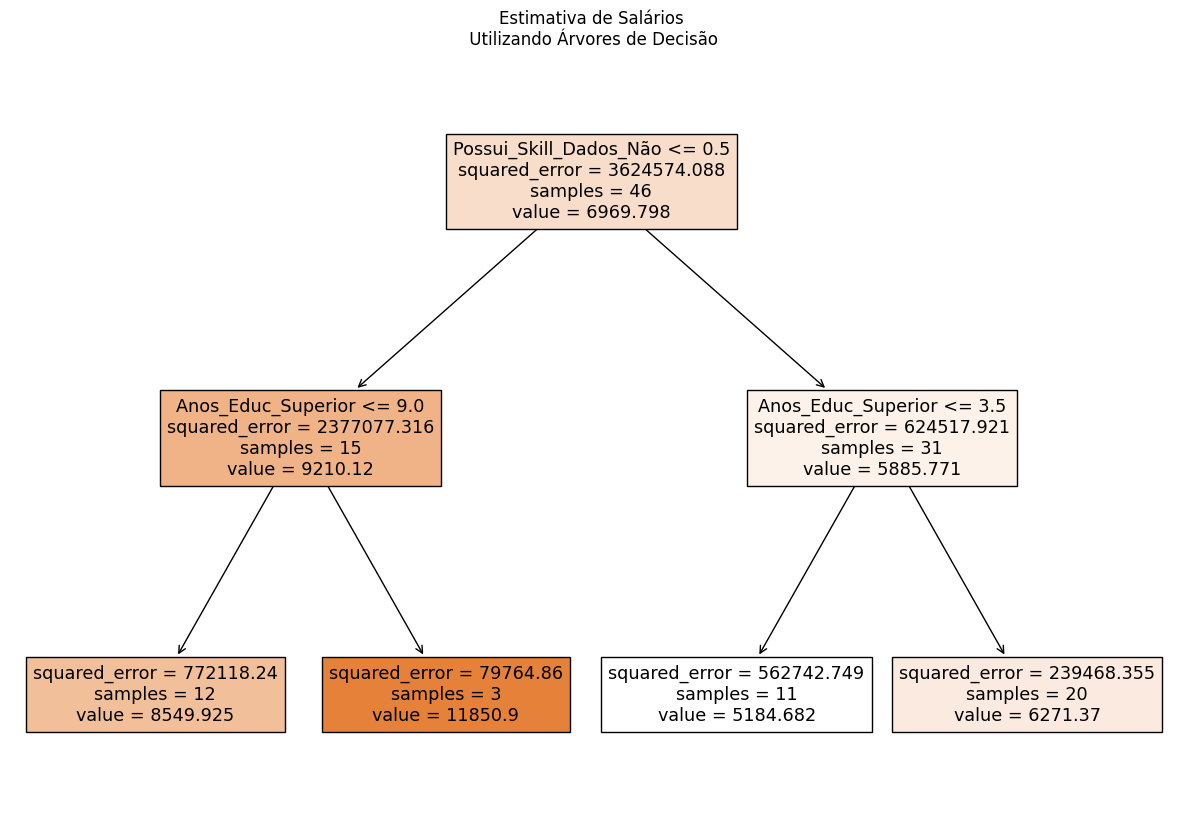

In [12]:
sns.reset_defaults()
%matplotlib inline
fig = plt.figure(figsize=(15,10))
features = list(x.columns)
tree.plot_tree(modelo_salario,
               feature_names=features,
               filled=True);
plt.title("Estimativa de Salários\n Utilizando Árvores de Decisão");

c:\Users\rocki\OneDrive\Documentos\GitHub\Salario\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


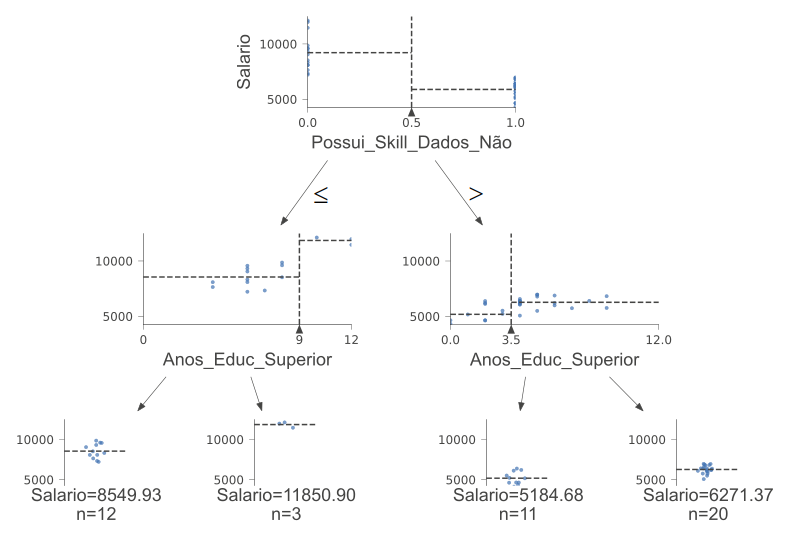

In [13]:
viz = dtreeviz(tree_model=modelo_salario, 
               x_data=x, y_data=y, 
               target_name='Salario',
               feature_names=features,
               scale=2.0)
viz

#### Desempenho do Modelo

In [14]:
# Cálculo do desempenho do modelo: R²
r2 = r2_score(y, modelo_salario.predict(x))

n = len(y)
p = x.shape[1]
r2_adjusted = 1 - (1 - r2) * (n - 1)/(n - p - 1)

print(f"R²: {r2:.4f}")
print(f"R² Ajustado: {r2_adjusted:.4f}")

R²: 0.8771
R² Ajustado: 0.8618


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [16]:
predictions = modelo_salario.predict(X_test)

In [17]:
# Calculating MAE
mae = mean_absolute_error(Y_test, predictions)
print(f"MAE: {mae}")

# Calculating MSE
mse = mean_squared_error(Y_test, predictions)
print(f"MSE: {mse}")

# Calculating RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Calculating MAPE
mape = np.mean(np.abs((Y_test - predictions) / Y_test)) * 100
print(f"MAPE: {mape}")

MAE: 554.4632467532475
MSE: 453022.9350110987
RMSE: 673.0697846517096
MAPE: 9.117093301301244
